In [246]:
import pandas as pd

In [247]:
vente = pd.read_csv('data/SALE_ALL.csv')
achat = pd.read_csv('data/PURCHASE_ALL.csv')
prodid_map = pd.read_csv('data/ProductIdMapp.csv')
produit_perime = pd.read_csv('data/ProduitsPerimes.csv')

In [248]:
vente.head()

,orderdate,prodid,quantity
0,2019-08-08,2701,1.0
1,2019-08-08,4284,1.0
2,2019-08-08,2154,1.0
3,2019-08-08,275,1.0
4,2019-08-08,3616,1.0


In [249]:
achat.head()

,orderdate,prodid,quantity
0,2019-08-08,113,1.0
1,2019-08-08,130,2.0
2,2019-08-08,131,30.0
3,2019-08-08,145,1.0
4,2019-08-08,146,5.0


In [250]:
vente.shape, achat.shape

((622506, 3), (136129, 3))

In [251]:
vente.duplicated().sum()

np.int64(133580)

In [252]:
# supprimer les doublons

vente = vente.drop_duplicates()
vente.shape

(488926, 3)

In [253]:
achat.duplicated().sum()

np.int64(623)

In [254]:
achat = achat.drop_duplicates()

In [255]:
vente.isnull().sum(), achat.isnull().sum()

(orderdate    0
 prodid       0
 quantity     0
 dtype: int64,
 orderdate    0
 prodid       0
 quantity     0
 dtype: int64)

In [256]:
prodid_map.head()

,prodid,name
0,100,MULTIVITAMINES GLOBAL 12 VIT+ 7 OLIGO ELEMENTS...
1,102,804 AIDE MINCEUR TRIPLE ACTION CP B/30 3CHENE
2,103,804 BRULE GRAISSE SOL BUV STABILISATEUR FL/500ML
3,104,804 PACK MINCEUR
4,105,804 SOUPE B/300G LEGUMES


In [257]:
# faire 'id' comme index

prodid_map = prodid_map.set_index('prodid')
prodid_map.head()

,name
prodid,
100,MULTIVITAMINES GLOBAL 12 VIT+ 7 OLIGO ELEMENTS...
102,804 AIDE MINCEUR TRIPLE ACTION CP B/30 3CHENE
103,804 BRULE GRAISSE SOL BUV STABILISATEUR FL/500ML
104,804 PACK MINCEUR
105,804 SOUPE B/300G LEGUMES


In [258]:
produit_perime.head()

,prodid,qmp
0,102,1.0
1,210,1.0
2,216,15.0
3,219,1.0
4,225,1.0


In [259]:
# Affichager des n top produits les plus perimés (QMP > critere)
# QMP = Quantité Moyenne par Produit Périmé

critere = 10

plus_perime = produit_perime[produit_perime['qmp'] >= critere].sort_values('qmp', ascending=False)

plus_perime.join(prodid_map, on='prodid')

,prodid,qmp,name
326,5469,300.0,COVID ORGANICS TISANE SOL BUV FL/33ML IMRA
304,5219,52.0,COTON HYDR SUP 25G ORELIA
285,4968,27.0,ZINNIA-F CP ENR B/3*28 FAMY CARE LTD
259,4592,19.0,THYMENT - CIMETIDINE 400MG CP DET PL/10
221,3700,19.0,PHENOBARBITAL 40MG/1ML SOL INJ DET CIRON
338,5623,18.0,RIZIDE 80MG CP DET SUNRISE
91,1576,16.0,DOLIPRANE 300MG SACH DET (16-48 KG) SANOFI AVE...
2,216,15.0,ALERID 10MG CP DET PL/10 CIPLA
441,6936,13.0,BANDELETTE EXACTIVE EQ MICROTECH MEDICAL (HAN...
363,5870,10.0,HCQS HYDROXYCHLOROQUINE SULFATE 200MG CP PELLI...


In [260]:
# Filtrer les données de vente pour ne garder que les produits dans 'plus_perime'

vente_perime = vente[vente['prodid'].isin(plus_perime['prodid'])]
vente_perime.head()

,orderdate,prodid,quantity
961,2019-08-24,1576,2.0
1143,2019-08-27,1576,8.0
1323,2019-08-29,1576,4.0
1429,2019-08-30,216,1.0
1753,2019-09-03,216,1.0


In [261]:
achat_perime = achat[achat['prodid'].isin(plus_perime['prodid'])]
achat_perime.head()

,orderdate,prodid,quantity
645,2019-08-09,216,10.0
1848,2019-08-24,4968,80.0
1916,2019-08-24,1576,12.0
3461,2019-09-27,1576,12.0
3714,2019-10-04,216,10.0


In [262]:
vente_perime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1627 entries, 961 to 622039
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   orderdate  1627 non-null   object 
 1   prodid     1627 non-null   int64  
 2   quantity   1627 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 50.8+ KB


In [263]:
achat_perime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 645 to 135134
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   orderdate  166 non-null    object 
 1   prodid     166 non-null    int64  
 2   quantity   166 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.2+ KB


In [264]:
# Transformer la colonne 'orderdate' en datetime

vente_perime['orderdate'] = pd.to_datetime(vente_perime['orderdate'])
achat_perime['orderdate'] = pd.to_datetime(achat_perime['orderdate'])

/tmp/ipykernel_4560/1740534343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vente_perime['orderdate'] = pd.to_datetime(vente_perime['orderdate'])
/tmp/ipykernel_4560/1740534343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  achat_perime['orderdate'] = pd.to_datetime(achat_perime['orderdate'])


In [265]:
vente_perime = vente_perime.pivot_table(index= 'orderdate',columns='prodid', values='quantity', aggfunc='mean')
vente_perime.head()

prodid,216,1576,3700,4592,4968,5219,5469,5623,5870,6936
orderdate,,,,,,,,,,
2019-08-24,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-27,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-29,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-30,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-03,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
achat_perime = achat_perime.pivot_table(index= 'orderdate',columns='prodid', values='quantity', aggfunc='mean')
achat_perime.head()

prodid,216,1576,3700,4592,4968,5219,5469,5623,5870,6936
orderdate,,,,,,,,,,
2019-08-09,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-24,NaN,12.0,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN
2019-09-27,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-04,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-19,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
# Remplacer les valeurs manquantes par 0
vente_perime = vente_perime.fillna(0)
vente_perime.head()

prodid,216,1576,3700,4592,4968,5219,5469,5623,5870,6936
orderdate,,,,,,,,,,
2019-08-24,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-27,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-29,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-09-03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [268]:
achat_perime = achat_perime.fillna(0)
achat_perime.head()

prodid,216,1576,3700,4592,4968,5219,5469,5623,5870,6936
orderdate,,,,,,,,,,
2019-08-09,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-24,0.0,12.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0
2019-09-27,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-10-04,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-10-19,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [269]:
vente_perime.shape, achat_perime.shape

((867, 10), (153, 10))

In [270]:
vente_perime.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 867 entries, 2019-08-24 to 2025-03-11
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   216     867 non-null    float64
 1   1576    867 non-null    float64
 2   3700    867 non-null    float64
 3   4592    867 non-null    float64
 4   4968    867 non-null    float64
 5   5219    867 non-null    float64
 6   5469    867 non-null    float64
 7   5623    867 non-null    float64
 8   5870    867 non-null    float64
 9   6936    867 non-null    float64
dtypes: float64(10)
memory usage: 74.5 KB


In [271]:
achat_perime.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 2019-08-09 to 2025-03-04
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   216     153 non-null    float64
 1   1576    153 non-null    float64
 2   3700    153 non-null    float64
 3   4592    153 non-null    float64
 4   4968    153 non-null    float64
 5   5219    153 non-null    float64
 6   5469    153 non-null    float64
 7   5623    153 non-null    float64
 8   5870    153 non-null    float64
 9   6936    153 non-null    float64
dtypes: float64(10)
memory usage: 13.1 KB


In [272]:
vente_perime[5219].head()

orderdate
2019-08-24    0.0
2019-08-27    0.0
2019-08-29    0.0
2019-08-30    0.0
2019-09-03    0.0
Name: 5219, dtype: float64

<Axes: xlabel='orderdate'>

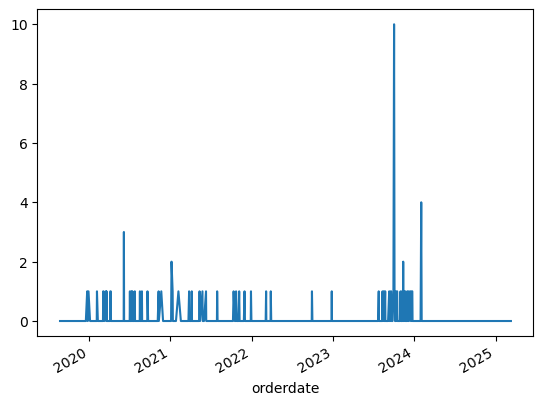

In [273]:
vente_perime[5219].plot()

In [274]:
vp_norm = vente_perime.resample('MS').mean()
ap_norm = achat_perime.resample('MS').mean()

In [275]:
print(vp_norm.shape, ap_norm.shape)

(68, 10) (68, 10)


In [276]:
vp_norm.head()

prodid,216,1576,3700,4592,4968,5219,5469,5623,5870,6936
orderdate,,,,,,,,,,
2019-08-01,0.250000,3.500000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2019-09-01,1.000000,0.000000,0.0,0.0,0.333333,0.000000,0.0,0.0,0.0,0.0
2019-10-01,1.111111,0.444444,0.0,0.0,1.222222,0.000000,0.0,0.0,0.0,0.0
2019-11-01,0.833333,0.666667,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2019-12-01,0.285714,2.000000,0.0,0.0,0.142857,0.285714,0.0,0.0,0.0,0.0


In [277]:
ap_norm.head()

prodid,216,1576,3700,4592,4968,5219,5469,5623,5870,6936
orderdate,,,,,,,,,,
2019-08-01,5.0,6.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0
2019-09-01,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-10-01,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-01,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [278]:
ap_norm.fillna(0, inplace=True)

In [279]:
ap_norm.head()

prodid,216,1576,3700,4592,4968,5219,5469,5623,5870,6936
orderdate,,,,,,,,,,
2019-08-01,5.0,6.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0
2019-09-01,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-10-01,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-01,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


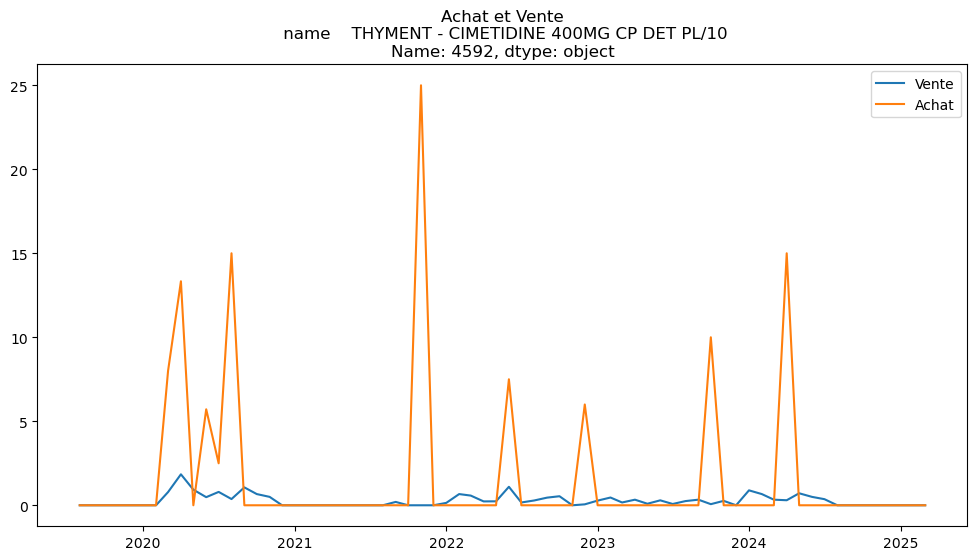

In [280]:
# Afficher les deux courbes d'achat/vente de cotons sur le même graphique

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(vp_norm[4592], label='Vente')
plt.plot(ap_norm[4592], label='Achat')
plt.title(f'Achat et Vente\n {prodid_map.loc[4592]}')
plt.legend()
plt.show()

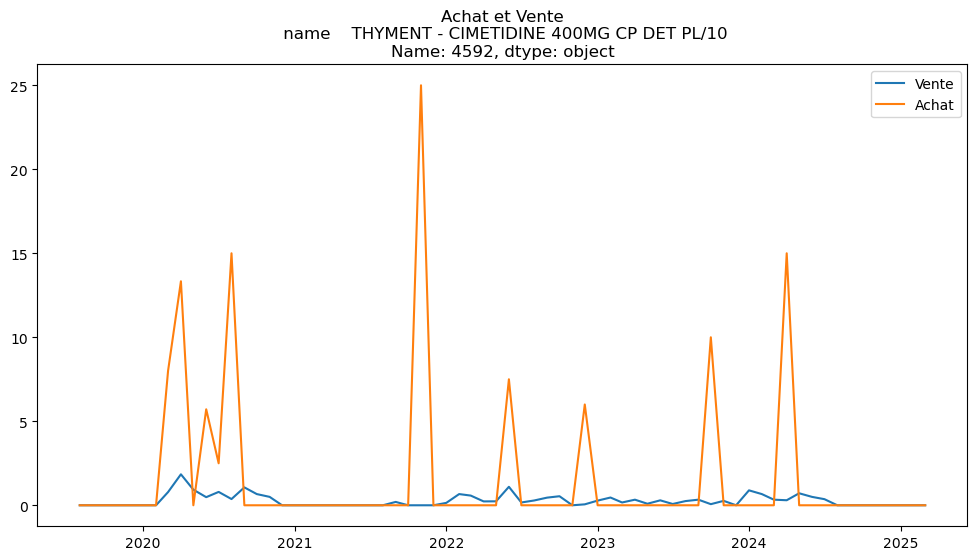

In [281]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(vp_norm[4592], label='Vente')
plt.plot(ap_norm[4592], label='Achat')
plt.title(f'Achat et Vente\n {prodid_map.loc[4592]}')
plt.legend()
plt.show()

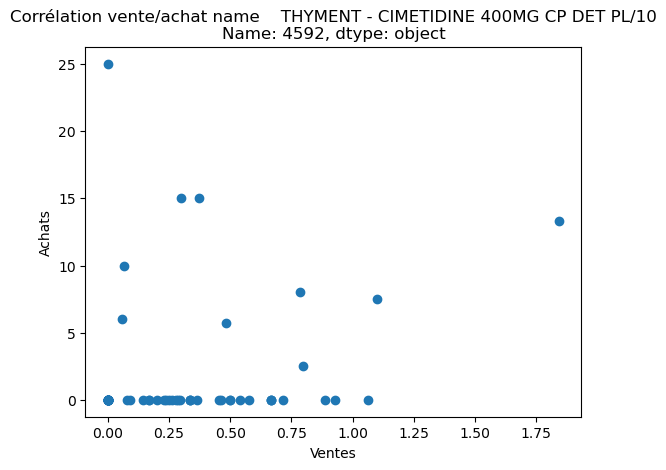

In [282]:
# Etude de la corrélation entre les ventes et les achats
# Visualiser la corrélation entre les ventes et les achats avec un scatter plot

import matplotlib.pyplot as plt

plt.scatter(vp_norm[4592], ap_norm[4592])
plt.xlabel('Ventes')
plt.ylabel('Achats')
plt.title(f'Corrélation vente/achat {prodid_map.loc[4592]}')
plt.show()


In [283]:
vp_norm[[5469, 5219]].head()

prodid,5469,5219
orderdate,,
2019-08-01,0.0,0.000000
2019-09-01,0.0,0.000000
2019-10-01,0.0,0.000000
2019-11-01,0.0,0.000000
2019-12-01,0.0,0.285714


In [284]:
# Combiner les ventes et les achats dans un seul dataframe

data = pd.concat([vp_norm[[5469,5219,4968,4592,3700]], ap_norm[[5469,5219,4968, 4592,3700]]], axis=1, keys=['ventes', 'achats'])
data.head()

ventes                               achats                     
prodid       5469      5219      4968 4592 3700   5469 5219  4968 4592 3700
orderdate                                                                  
2019-08-01    0.0  0.000000  0.000000  0.0  0.0    0.0  0.0  40.0  0.0  0.0
2019-09-01    0.0  0.000000  0.333333  0.0  0.0    0.0  0.0   0.0  0.0  0.0
2019-10-01    0.0  0.000000  1.222222  0.0  0.0    0.0  0.0   0.0  0.0  0.0
2019-11-01    0.0  0.000000  0.000000  0.0  0.0    0.0  0.0   0.0  0.0  0.0
2019-12-01    0.0  0.285714  0.142857  0.0  0.0    0.0  1.0   0.0  0.0  0.0

/tmp/ipykernel_4560/1207689782.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


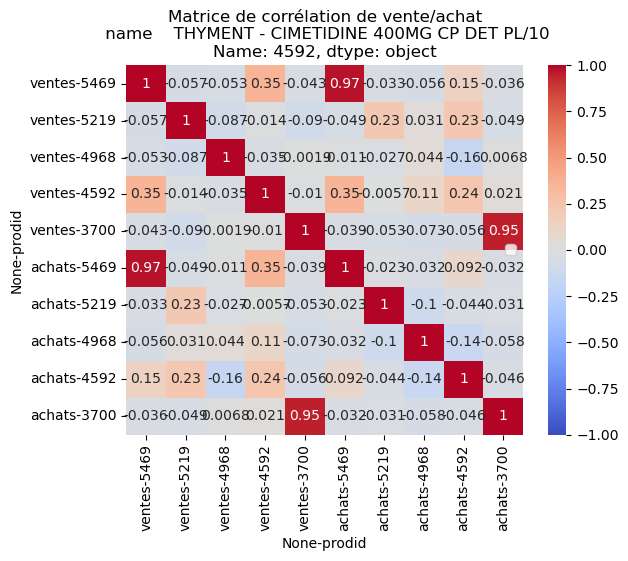

In [285]:
# Visualiser de la matrice de corrélation
import seaborn as sns

plt.Figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmax=1, vmin=-1)
plt.legend()
plt.title(f'Matrice de corrélation de vente/achat\n {prodid_map.loc[4592]}')
plt.show()

In [286]:
prodid_map.loc[5469]

name    COVID ORGANICS TISANE SOL BUV FL/33ML IMRA
Name: 5469, dtype: object

In [ ]:
# Créer un dataframe avec les ventes et les achats de coton et la différence entre les deux

flow = pd.DataFrame()

ValueError: Cannot set a DataFrame with multiple columns to the single column diff